In [112]:
#import spikeinterface modules
import spikeinterface as si
import spikeinterface.extractors as se
import spikeinterface.toolkit as st
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
import numpy as np
from numpy import asarray
import glob
import pickle

#import everything else
import os
import sys
import numpy as np
import neo
import pandas as pd
import scipy

# MCS
import McsPy
import McsPy.McsData
import McsPy.McsCMOS
from McsPy import ureg, Q_

# Plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns

#SK Learn
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#networkx
import plotly.graph_objects as go
import networkx as nx
import matplotlib.patches as mpatches


#statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
from patsy import dmatrices

from time import strftime
pd.options.display.max_columns = None
%matplotlib inline



In [2]:
working_directory = r"D:\Files_Reutlingen_Jenny\19-04-16\190416_paper\analysis_01_HCx_GFP_B_aCSF_base"

output_directory = r"D:\Files_Reutlingen_Jenny\19-04-16\190416_paper\analysis_01_HCx_GFP_B_aCSF_base"

In [3]:
os.chdir(working_directory)

In [4]:
filename= '01_HCx_GFP_B_aCSF_base'

In [5]:
#load the main recording dic
MAIN_RECORDING_DICTIONARY = pickle.load(open(os.path.join(output_directory+'\\MAIN_RECORDING_Dictionary_'+filename+'.pkl'), "rb"))

In [6]:
MAIN_RECORDING_DICTIONARY.keys()

dict_keys(['spikedic_MAD', 'network_bursts_seconds', 'fr_dic', 'isi_dictionary', 'isi_average_dic', 'Infos_Recording', 'Infos_Analysis', 'Infos_Anatomy', 'Bursts', 'Interburst-Intervals', 'bursting_time_per_channel', 'bursts_per_channel', 'burst_connections', 'GRAPH_shared_bursts', 'Basics'])

In [119]:
network_bursts_seconds = MAIN_RECORDING_DICTIONARY['network_bursts_seconds']
spikedic_MAD = MAIN_RECORDING_DICTIONARY['spikedic_MAD']
fr_dic = MAIN_RECORDING_DICTIONARY['fr_dic']
isi_dictionary = MAIN_RECORDING_DICTIONARY['isi_dictionary']
isi_average_dic = MAIN_RECORDING_DICTIONARY['isi_average_dic']
Infos_Recording = MAIN_RECORDING_DICTIONARY['Infos_Recording']
Infos_Analysis = MAIN_RECORDING_DICTIONARY['Infos_Analysis']
Infos_Anatomy = MAIN_RECORDING_DICTIONARY['Infos_Anatomy']
Bursts = MAIN_RECORDING_DICTIONARY['Bursts']
Interburst_Intervals = MAIN_RECORDING_DICTIONARY['Interburst-Intervals']
bursting_time_per_channel = MAIN_RECORDING_DICTIONARY['bursting_time_per_channel']
bursts_per_channel = MAIN_RECORDING_DICTIONARY['bursts_per_channel']
burst_connections = MAIN_RECORDING_DICTIONARY['burst_connections']
Basics = MAIN_RECORDING_DICTIONARY['Basics']
inverted_layerdic = Infos_Anatomy['layerdic_invert']
layerdic = Infos_Anatomy['layerdic']

In [9]:
def get_values_per_layer(input_dic, inverted_layerdic, layerdic):
    
    value_per_layer_dic = {}
    interims_dic = {}
    
    
    for key in input_dic:
        try:
            
            corresponding_layer = inverted_layerdic[key]
            interims_dic[key] = (input_dic[key], corresponding_layer)
        except:
            print('Channel Missing')
            
    for key in layerdic:
        
        
        layerlist = []
        for key2 in interims_dic:
            if interims_dic[key2][1] == key:
                layerlist.append(interims_dic[key2][0])
                
        if len(layerlist) > 0:

            try:
                layerlist = [j for i in layerlist for j in i]
            except:
                pass

        if len(layerlist) == 0:
            pass
        else:
            layer_array = np.asarray(layerlist)
            value_per_layer_dic[key] = layer_array
        
    return value_per_layer_dic

# we retrieve data per layer

In [47]:
[bursts_per_channel.values().items()]

AttributeError: 'dict_values' object has no attribute 'items'

In [11]:
network_bursts_seconds = MAIN_RECORDING_DICTIONARY['network_bursts_seconds']
spikedic_MAD = MAIN_RECORDING_DICTIONARY['spikedic_MAD']
fr_dic = MAIN_RECORDING_DICTIONARY['fr_dic']
isi_dictionary = MAIN_RECORDING_DICTIONARY['isi_dictionary']
isi_average_dic = MAIN_RECORDING_DICTIONARY['isi_average_dic']
Infos_Recording = MAIN_RECORDING_DICTIONARY['Infos_Recording']
Infos_Analysis = MAIN_RECORDING_DICTIONARY['Infos_Analysis']
Infos_Anatomy = MAIN_RECORDING_DICTIONARY['Infos_Anatomy']
Bursts = MAIN_RECORDING_DICTIONARY['Bursts']
Interburst_Intervals = MAIN_RECORDING_DICTIONARY['Interburst-Intervals']
bursting_time_per_channel = MAIN_RECORDING_DICTIONARY['bursting_time_per_channel']
bursts_per_channel = MAIN_RECORDING_DICTIONARY['bursts_per_channel']
burst_connections = MAIN_RECORDING_DICTIONARY['burst_connections']
Basics = MAIN_RECORDING_DICTIONARY['Basics']

In [12]:
fr_per_layer = get_values_per_layer(fr_dic, inverted_layerdic, layerdic)
isi_per_layer = get_values_per_layer(isi_dictionary, inverted_layerdic, layerdic)
bursts_channel_per_layer = get_values_per_layer(bursts_per_channel, inverted_layerdic, layerdic)
bursting_time_per_channel_per_layer = get_values_per_layer(bursting_time_per_channel, inverted_layerdic, layerdic)
interburst_intervals_per_layer = get_values_per_layer(Interburst_Intervals, inverted_layerdic, layerdic)


Channel Missing
Channel Missing
Channel Missing
Channel Missing
Channel Missing
Channel Missing
Channel Missing
Channel Missing
Channel Missing
Channel Missing


In [14]:
def get_basic_stats_per_layer(somedic_per_layer):

    mean_stats_layer = {}
    std_stats_layer = {}
    median_stats_layer = {}
    
    
    for key in somedic_per_layer:
        mean_stats_layer[key] = np.mean(somedic_per_layer[key])
        std_stats_layer[key] = np.std(somedic_per_layer[key])
        median_stats_layer[key] = np.median(somedic_per_layer[key])
        
        
    return mean_stats_layer, std_stats_layer, median_stats_layer


In [15]:
fr_mean_layer, fr_std_layer, fr_median_layer = get_basic_stats_per_layer(fr_per_layer)
isi_mean_layer, isi_std_layer, isi_median_layer = get_basic_stats_per_layer(isi_per_layer)
burst_per_channel_mean_layer, burst_per_channel_std_layer, burst_per_channel_median_layer = get_basic_stats_per_layer(bursts_channel_per_layer)
burst_time_per_channel_mean_layer, burst_time_per_channel_std_layer, burst_time_per_channel_median_layer = get_basic_stats_per_layer(bursting_time_per_channel_per_layer)
interburst_intervals_per_layer_mean, interburst_intervals_per_layer_std, interburst_intervals_per_layer_median = get_basic_stats_per_layer(interburst_intervals_per_layer)

In [20]:
integrated_df = pd.DataFrame(columns=["filename", "recording_date", "timelength_recording_s", "medium", "drug", "firingrate_whole", "active_channels", 
                                      "isi_threshold_base", "number_of_bursts", "isi_average", "ibi_average", "firingrate_layer1_mean", "firingrate_layer1_median",
                                      "firingrate_layer1_std", "isi_layer1_mean", "isi_layer1_median", "isi_layer1_std", "bursts_per_channel_layer1_mean", 
                                      "bursts_per_channel_layer1_median", "bursts_per_channel_layer1_std", "firingrate_layer2-3_mean", "firingrate_layer2-3_median", 
                                      "firingrate_layer2-3_std", "isi_layer2-3_mean", "isi_layer2-3_median", "isi_layer2-3_std", "bursts_per_channel_layer2-3_mean", 
                                      "bursts_per_channel_layer2-3_median", "bursts_per_channel_layer2-3_std", "firingrate_layer4_mean", "firingrate_layer4_median", 
                                      "firingrate_layer4_std", "isi_layer4_mean", "isi_layer4_median", "isi_layer4_std", "bursts_per_channel_layer4_mean", 
                                      "bursts_per_channel_layer4_median", "bursts_per_channel_layer4_std", "firingrate_layer5-6_mean", "firingrate_layer5-6_median", 
                                      "firingrate_layer5-6_std", "isi_layer5-6_mean", "isi_layer5-6_median", "isi_layer5-6_std", "bursts_per_channel_layer5-6_mean", 
                                      "bursts_per_channel_layer5-6_median", "bursts_per_channel_layer5-6_std", "firingrate_whitematter_mean", "firingrate_whitematter_median", 
                                      "firingrate_whitematter_std", "isi_whitematter_mean", "isi_whitematter_median", "isi_whitematter_std", "bursts_per_channel_whitematter_mean", 
                                      "bursts_per_channel_whitematter_median", "bursts_per_channel_whitematter_std"])
                                      

In [27]:
MAIN_RECORDING_DICTIONARY['Infos_Recording']

{'info_dics_subrecordings': {'0_to_120': {'tick': 40,
   'timelengthrecording_s': 1800.0,
   'first_recording_timepoint': 0,
   'scale_factor_for_second': 1e-06,
   'network_burst_threshold_basline': 387.93417704353266},
  '1080_to_1200': {'tick': 40,
   'timelengthrecording_s': 1800.0,
   'first_recording_timepoint': 0,
   'scale_factor_for_second': 1e-06,
   'network_burst_threshold_basline': 434.5020267678358},
  '1200_to_1320': {'tick': 40,
   'timelengthrecording_s': 1800.0,
   'first_recording_timepoint': 0,
   'scale_factor_for_second': 1e-06,
   'network_burst_threshold_basline': 409.35223004803476},
  '120_to_240': {'tick': 40,
   'timelengthrecording_s': 1800.0,
   'first_recording_timepoint': 0,
   'scale_factor_for_second': 1e-06,
   'network_burst_threshold_basline': 382.541912766984},
  '1320_to_1440': {'tick': 40,
   'timelengthrecording_s': 1800.0,
   'first_recording_timepoint': 0,
   'scale_factor_for_second': 1e-06,
   'network_burst_threshold_basline': 413.794267159

In [91]:
dictionary_for_dataframe = {}


# fill up all basic recoding infos
dictionary_for_dataframe["filename"] = filename
dictionary_for_dataframe["recording_date"] = Infos_Recording["recordings_date"]
dictionary_for_dataframe["timelength_recording_s"] = Infos_Recording["timelengthrecording_s"]
dictionary_for_dataframe["medium"] = 'aCSF_baseline'
dictionary_for_dataframe["drug"] = 'none'
dictionary_for_dataframe["drug_concentration_µM"] = 0
dictionary_for_dataframe["firingrate_whole_Hz"] = Basics["mean_fr_whole_recording"]
dictionary_for_dataframe["active_channels"] = Basics["active_channels"]


# 
dictionary_for_dataframe["isi_burst_threshold_µs"] = Infos_Analysis["isi_burst_threshold_base"]
dictionary_for_dataframe["number_of_bursts"] = np.sum(list(bursts_per_channel.values()))
dictionary_for_dataframe["isi_average"] = np.mean(list(MAIN_RECORDING_DICTIONARY["isi_average_dic"].values()))

ibi_list = list(MAIN_RECORDING_DICTIONARY["Interburst-Intervals"].values())
dictionary_for_dataframe["ibi_average"] = np.mean(np.sum(ibi_list))

# add up information per layer
for key in layerdic:
    if key in fr_mean_layer.keys():
        dictionary_for_dataframe["firingrate_"+key+"_mean"] = fr_mean_layer[key]
        dictionary_for_dataframe["firingrate_"+key+"_median"] = fr_median_layer[key]
        dictionary_for_dataframe["firingrate_"+key+"_std"] = fr_std_layer[key]
        dictionary_for_dataframe["isi_"+key+"_mean"] = isi_mean_layer[key]
        dictionary_for_dataframe["isi_"+key+"_median"] = isi_median_layer[key]
        dictionary_for_dataframe["isi_"+key+"_std"] = isi_std_layer[key]
        dictionary_for_dataframe["bursts_per_channel_"+key+"_mean"] = burst_per_channel_mean_layer[key]
        dictionary_for_dataframe["bursts_per_channel_"+key+"_median"] = burst_per_channel_median_layer[key]
        dictionary_for_dataframe["bursts_per_channel_"+key+"_std"] = burst_per_channel_std_layer[key]
        dictionary_for_dataframe["bursts_time_per_channel_"+key+"_mean"] = burst_time_per_channel_mean_layer[key]
        dictionary_for_dataframe["bursts_time_per_channel_"+key+"_median"] = burst_time_per_channel_median_layer[key]
        dictionary_for_dataframe["bursts_time_per_channel_"+key+"_std"] = burst_per_channel_std_layer[key]
        dictionary_for_dataframe["interburst_intervals_"+key+"_mean"] = interburst_intervals_per_layer_mean[key]
        dictionary_for_dataframe["interburst_intervals_"+key+"_median"] = interburst_intervals_per_layer_median[key]
        dictionary_for_dataframe["interburst_intervals_"+key+"_std"] = interburst_intervals_per_layer_std[key]
    else:
        dictionary_for_dataframe["firingrate_"+key+"_mean"] = np.nan
        dictionary_for_dataframe["firingrate_"+key+"_median"] = np.nan
        dictionary_for_dataframe["firingrate_"+key+"_std"] = np.nan
        dictionary_for_dataframe["isi_"+key+"_mean"] = np.nan
        dictionary_for_dataframe["isi_"+key+"_median"] = np.nan
        dictionary_for_dataframe["isi_"+key+"_std"] = np.nan
        dictionary_for_dataframe["bursts_per_channel_"+key+"_mean"] = np.nan
        dictionary_for_dataframe["bursts_per_channel_"+key+"_median"] = np.nan
        dictionary_for_dataframe["bursts_per_channel_"+key+"_std"] = np.nan
        dictionary_for_dataframe["bursts_time_per_channel_"+key+"_mean"] = np.nan
        dictionary_for_dataframe["bursts_time_per_channel_"+key+"_median"] = np.nan
        dictionary_for_dataframe["bursts_time_per_channel_"+key+"_std"] = np.nan
        dictionary_for_dataframe["interburst_intervals_"+key+"_mean"] = np.nan
        dictionary_for_dataframe["interburst_intervals_"+key+"_median"] = np.nan
        dictionary_for_dataframe["interburst_intervals_"+key+"_std"] = np.nan
    








In [100]:
columns = list(dictionary_for_dataframe.keys())

In [101]:
columns

['filename',
 'recording_date',
 'timelength_recording_s',
 'medium',
 'drug',
 'drug_concentration_µM',
 'firingrate_whole_Hz',
 'active_channels',
 'isi_burst_threshold_µs',
 'number_of_bursts',
 'isi_average',
 'ibi_average',
 'firingrate_layer1_mean',
 'firingrate_layer1_median',
 'firingrate_layer1_std',
 'isi_layer1_mean',
 'isi_layer1_median',
 'isi_layer1_std',
 'bursts_per_channel_layer1_mean',
 'bursts_per_channel_layer1_median',
 'bursts_per_channel_layer1_std',
 'bursts_time_per_channel_layer1_mean',
 'bursts_time_per_channel_layer1_median',
 'bursts_time_per_channel_layer1_std',
 'interburst_intervals_layer1_mean',
 'interburst_intervals_layer1_median',
 'interburst_intervals_layer1_std',
 'firingrate_layer2-3_mean',
 'firingrate_layer2-3_median',
 'firingrate_layer2-3_std',
 'isi_layer2-3_mean',
 'isi_layer2-3_median',
 'isi_layer2-3_std',
 'bursts_per_channel_layer2-3_mean',
 'bursts_per_channel_layer2-3_median',
 'bursts_per_channel_layer2-3_std',
 'bursts_time_per_chan

In [107]:
df = pd.DataFrame.from_records([dictionary_for_dataframe])

In [113]:
df

,filename,recording_date,timelength_recording_s,medium,drug,drug_concentration_µM,firingrate_whole_Hz,active_channels,isi_burst_threshold_µs,number_of_bursts,isi_average,ibi_average,firingrate_layer1_mean,firingrate_layer1_median,firingrate_layer1_std,isi_layer1_mean,isi_layer1_median,isi_layer1_std,bursts_per_channel_layer1_mean,bursts_per_channel_layer1_median,bursts_per_channel_layer1_std,bursts_time_per_channel_layer1_mean,bursts_time_per_channel_layer1_median,bursts_time_per_channel_layer1_std,interburst_intervals_layer1_mean,interburst_intervals_layer1_median,interburst_intervals_layer1_std,firingrate_layer2-3_mean,firingrate_layer2-3_median,firingrate_layer2-3_std,isi_layer2-3_mean,isi_layer2-3_median,isi_layer2-3_std,bursts_per_channel_layer2-3_mean,bursts_per_channel_layer2-3_median,bursts_per_channel_layer2-3_std,bursts_time_per_channel_layer2-3_mean,bursts_time_per_channel_layer2-3_median,bursts_time_per_channel_layer2-3_std,interburst_intervals_layer2-3_mean,interburst_intervals_layer2-3_median,interburst_intervals_layer2-3_std,firingrate_layer4_mean,firingrate_layer4_median,firingrate_layer4_std,isi_layer4_mean,isi_layer4_median,isi_layer4_std,bursts_per_channel_layer4_mean,bursts_per_channel_layer4_median,bursts_per_channel_layer4_std,bursts_time_per_channel_layer4_mean,bursts_time_per_channel_layer4_median,bursts_time_per_channel_layer4_std,interburst_intervals_layer4_mean,interburst_intervals_layer4_median,interburst_intervals_layer4_std,firingrate_layer5-6_mean,firingrate_layer5-6_median,firingrate_layer5-6_std,isi_layer5-6_mean,isi_layer5-6_median,isi_layer5-6_std,bursts_per_channel_layer5-6_mean,bursts_per_channel_layer5-6_median,bursts_per_channel_layer5-6_std,bursts_time_per_channel_layer5-6_mean,bursts_time_per_channel_layer5-6_median,bursts_time_per_channel_layer5-6_std,interburst_intervals_layer5-6_mean,interburst_intervals_layer5-6_median,interburst_intervals_layer5-6_std,firingrate_whitematter_mean,firingrate_whitematter_median,firingrate_whitematter_std,isi_whitematter_mean,isi_whitematter_median,isi_whitematter_std,bursts_per_channel_whitematter_mean,bursts_per_channel_whitematter_median,bursts_per_channel_whitematter_std,bursts_time_per_channel_whitematter_mean,bursts_time_per_channel_whitematter_median,bursts_time_per_channel_whitematter_std,interburst_intervals_whitematter_mean,interburst_intervals_whitematter_median,interburst_intervals_whitematter_std
0,01_HCx_GFP_B_aCSF_base,16.04.2019,1800.0,aCSF_baseline,none,0,1262.617,214,85000.0,112543,1239.786036,2.744302e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.141068,0.434444,1.510069,859.442262,23.12,5689.155017,91.435897,18.0,163.730672,19.812354,2.6224,163.730672,1.105896e+07,3638800.0,4.216964e+07,2.099259,1.271111,2.161931,469.691894,44.6,3574.694738,200.055556,72.5,264.42106,42.310231,14.94656,264.42106,6.575026e+06,2553320.0,2.499530e+07,7.336927,5.930556,6.198606,135.951579,27.48,699.434997,657.322785,472.5,600.594339,175.888646,126.18366,600.594339,2.271555e+06,802520.0,9.122485e+06,0.253667,0.018889,0.605566,3590.348132,86.6,20545.268807,22.314286,0.0,76.328153,4.073313,0.0,76.328153,8.592031e+06,5529180.0,1.996539e+07


In [88]:
re = np.mean(np.sum(ibi_list))

In [90]:
re

2744301.9703916037

In [67]:
for key in layerdic:
    if key in fr_mean_layer.keys():
        dictionary_for_dataframe["firingrate_"+key+"_mean"] = fr_mean_layer[key]
        dictionary_for_dataframe["firingrate_"+key+"_median"] = fr_median_layer[key]
        dictionary_for_dataframe["firingrate_"+key+"_std"] = fr_std_layer[key]
        dictionary_for_dataframe["isi_"+key+"_mean"] = isi_mean_layer[key]
        dictionary_for_dataframe["isi_"+key+"_median"] = isi_median_layer[key]
        dictionary_for_dataframe["isi_"+key+"_std"] = isi_std_layer[key]
        dictionary_for_dataframe["bursts_per_channel_"+key+"_mean"] = burst_per_channel_mean_layer[key]
        dictionary_for_dataframe["bursts_per_channel_"+key+"_median"] = burst_per_channel_median_layer[key]
        dictionary_for_dataframe["bursts_per_channel_"+key+"_std"] = burst_per_channel_std_layer[key]
        dictionary_for_dataframe["bursts_time_per_channel_"+key+"_mean"] = burst_time_per_channel_mean_layer[key]
        dictionary_for_dataframe["bursts_time_per_channel_"+key+"_median"] = burst_time_per_channel_median_layer[key]
        dictionary_for_dataframe["bursts_time_per_channel_"+key+"_std"] = burst_per_channel_std_layer[key]
        dictionary_for_dataframe["interburst_intervals_"+key+"_mean"] = interburst_intervals_per_layer_mean[key]
        dictionary_for_dataframe["interburst_intervals_"+key+"_median"] = interburst_intervals_per_layer_median[key]
        dictionary_for_dataframe["interburst_intervals_"+key+"_std"] = interburst_intervals_per_layer_std[key]
    else:
        dictionary_for_dataframe["firingrate_"+key+"_mean"] = np.nan
        dictionary_for_dataframe["firingrate_"+key+"_median"] = np.nan
        dictionary_for_dataframe["firingrate_"+key+"_std"] = np.nan
        dictionary_for_dataframe["isi_"+key+"_mean"] = np.nan
        dictionary_for_dataframe["isi_"+key+"_median"] = np.nan
        dictionary_for_dataframe["isi_"+key+"_std"] = np.nan
        dictionary_for_dataframe["bursts_per_channel_"+key+"_mean"] = np.nan
        dictionary_for_dataframe["bursts_per_channel_"+key+"_median"] = np.nan
        dictionary_for_dataframe["bursts_per_channel_"+key+"_std"] = np.nan
        dictionary_for_dataframe["bursts_time_per_channel_"+key+"_mean"] = np.nan
        dictionary_for_dataframe["bursts_time_per_channel_"+key+"_median"] = np.nan
        dictionary_for_dataframe["bursts_time_per_channel_"+key+"_std"] = np.nan
        dictionary_for_dataframe["interburst_intervals_"+key+"_mean"] = np.nan
        dictionary_for_dataframe["interburst_intervals_"+key+"_median"] = np.nan
        dictionary_for_dataframe["interburst_intervals_"+key+"_std"] = np.nan


no
yes
yes
yes
yes


In [65]:
"firingrate_layer1_mean", "firingrate_layer1_median",
                                      "firingrate_layer1_std", "isi_layer1_mean", "isi_layer1_median", "isi_layer1_std", "bursts_per_channel_layer1_mean", 
                                      "bursts_per_channel_layer1_median", "bursts_per_channel_layer1_std"

{'layer2-3': 1.1410683760683762,
 'layer4': 2.0992592592592594,
 'layer5-6': 7.336926863572434,
 'whitematter': 0.2536666666666667}

In [ ]:


                                      "firingrate_layer1_mean", "firingrate_layer1_median",
                                      "firingrate_layer1_std", "isi_layer1_mean", "isi_layer1_median", "isi_layer1_std", "bursts_per_channel_layer1_mean", 
                                      "bursts_per_channel_layer1_median", "bursts_per_channel_layer1_std", "firingrate_layer2-3_mean", "firingrate_layer2-3_median", 
                                      "firingrate_layer2-3_std", "isi_layer2-3_mean", "isi_layer2-3_median", "isi_layer2-3_std", "bursts_per_channel_layer2-3_mean", 
                                      "bursts_per_channel_layer2-3_median", "bursts_per_channel_layer2-3_std", "firingrate_layer4_mean", "firingrate_layer4_median", 
                                      "firingrate_layer4_std", "isi_layer4_mean", "isi_layer4_median", "isi_layer4_std", "bursts_per_channel_layer4_mean", 
                                      "bursts_per_channel_layer4_median", "bursts_per_channel_layer4_std", "firingrate_layer5-6_mean", "firingrate_layer5-6_median", 
                                      "firingrate_layer5-6_std", "isi_layer5-6_mean", "isi_layer5-6_median", "isi_layer5-6_std", "bursts_per_channel_layer5-6_mean", 
                                      "bursts_per_channel_layer5-6_median", "bursts_per_channel_layer5-6_std", "firingrate_whitematter_mean", "firingrate_whitematter_median", 
                                      "firingrate_whitematter_std", "isi_whitematter_mean", "isi_whitematter_median", "isi_whitematter_std", "bursts_per_channel_whitematter_mean", 
                                      "bursts_per_channel_whitematter_median", "bursts_per_channel_whitematter_std"

### Iteration through all MAIN Recording_Dics

Von hier kann über alle vorhanden Main-Recording Dics iteriert werden und nach Berechnung der jeweiligen Werte dann der DF aufgefüllt werden.

In [117]:
network_bursts_seconds

[(5.84, 6.675),
 (6.71, 6.875),
 (22.005, 22.885),
 (91.93, 92.205),
 (137.235, 137.745),
 (226.35500000000002, 227.88),
 (242.125, 242.805),
 (262.3, 262.84000000000003),
 (277.725, 277.99),
 (372.05, 373.345),
 (391.685, 391.825),
 (434.07, 434.69),
 (509.33500000000004, 527.26),
 (527.82, 531.815),
 (532.015, 532.41),
 (532.64, 532.665),
 (536.565, 537.395),
 (542.795, 543.535),
 (545.41, 546.285),
 (558.585, 559.41),
 (572.3000000000001, 573.57),
 (585.12, 585.29),
 (585.34, 585.44),
 (593.76, 595.645),
 (603.25, 603.315),
 (606.96, 609.25),
 (612.575, 612.6750000000001),
 (615.83, 616.03),
 (616.0500000000001, 616.065),
 (619.415, 619.975),
 (622.835, 623.025),
 (623.205, 623.6800000000001),
 (626.32, 627.335),
 (629.645, 629.99),
 (630.0550000000001, 630.75),
 (636.9350000000001, 638.1),
 (640.57, 641.1750000000001),
 (641.445, 642.525),
 (645.96, 646.02),
 (646.04, 646.0500000000001),
 (648.515, 649.44),
 (654.87, 656.575),
 (656.945, 658.27),
 (659.335, 660.36),
 (660.97, 662.6

In [116]:
max(Bursts['R12'])[0]*1e-06

1797.45292

In [17]:
burst_time_per_channel_mean_layer

{'layer2-3': 19.812353846153844,
 'layer4': 42.31023111111111,
 'layer5-6': 175.88864607594937,
 'whitematter': 4.073313142857143}

## We first need to find all possibe MAIN_RECORDING_DICTIONARIES.

### Iterate through all channels and find the MAIN Recoding Dics.



In [18]:
folderlist = glob.glob('*MAIN_RECORDING_Dictionary_*.pkl')

In [19]:
folderlist


['MAIN_RECORDING_Dictionary_01_HCx_GFP_B_aCSF_base.pkl']

In [21]:
isi_dictionary = MAIN_RECORDING_DICTIONARY['isi_dictionary']
fr_dic = MAIN_RECORDING_DICTIONARY['fr_dic']


In [22]:
Infos_antomy = MAIN_RECORDING_DICTIONARY['Infos_Anatomy']


In [57]:
inverted_layerdic = Infos_antomy['layerdic_invert']
layerdic = Infos_antomy['layerdic']


In [147]:
def get_values_per_layer(input_dic, inverted_layerdic, layerdic):
    
    value_per_layer_dic = {}
    interims_dic = {}
    
    
    for key in input_dic:
        try:
            
            corresponding_layer = inverted_layerdic[key]
            interims_dic[key] = (input_dic[key], corresponding_layer)
        except:
            print('Channel Missing')
            
    for key in layerdic:
        
        
        layerlist = []
        for key2 in interims_dic:
            if interims_dic[key2][1] == key:
                layerlist.append(interims_dic[key2][0])
                
        layerlist = [j for i in layerlist for j in i]
        
        if len(layerlist) == 0:
            pass
        else:
            layer_array = np.asarray(layerlist)
            value_per_layer_dic[key] = layer_array
        
    return value_per_layer_dic
                


    


In [148]:
d = get_values_per_layer(isi_dictionary, inverted_layerdic, layerdic)

Channel Missing
Channel Missing


In [149]:
# make dictionary into two array like objects for ploting

data = []
lables = []

for key, value in d.items():
    
    
    data.append(value)
    lables.append(key)

In [152]:
d

{'layer2-3': array([2373.6 , 2524.6 , 1518.4 , ...,  551.52,   14.56, 4268.88]),
 'layer4': array([1.2200000e+01, 1.2720000e+01, 1.5320000e+01, ..., 1.5626272e+05,
        1.0281464e+05, 3.7527080e+04]),
 'layer5-6': array([20.079999999999984, 25.32000000000002, 402.67999999999995, ...,
        45.11999999987893, 2.480000000214204, 46.76000000000931],
       dtype=object),
 'whitematter': array([ 12116.56,  10249.36,  21967.32, ..., 101710.76,  60686.72,
         39763.4 ])}

In [144]:
data

[array([], dtype=float64),
 array([2373.6 , 2524.6 , 1518.4 , ...,  551.52,   14.56, 4268.88]),
 array([1.2200000e+01, 1.2720000e+01, 1.5320000e+01, ..., 1.5626272e+05,
        1.0281464e+05, 3.7527080e+04]),
 array([20.079999999999984, 25.32000000000002, 402.67999999999995, ...,
        45.11999999987893, 2.480000000214204, 46.76000000000931],
       dtype=object),
 array([ 12116.56,  10249.36,  21967.32, ..., 101710.76,  60686.72,
         39763.4 ])]

In [135]:
len(data)

5

In [114]:
dd = [j for i in data for j in i]



In [115]:
len(dd)

250

<Figure size 360x720 with 0 Axes>

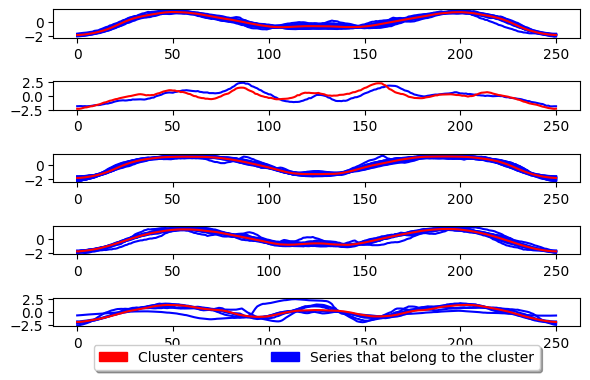

In [1]:
from sklearn.model_selection import train_test_split
from sktime.clustering import TimeSeriesKMeans
from sktime.clustering.evaluation._plot_clustering import plot_cluster_algorithm
from sktime.datasets import load_arrow_head

X, y = load_arrow_head(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

k_means = TimeSeriesKMeans(n_clusters=5, init_algorithm="forgy", metric="dtw")
k_means.fit(X_train)
plot_cluster_algorithm(k_means, X_test, k_means.n_clusters)

In [7]:
len(X_train)

158

In [10]:
k_means.n_clusters

5